## DATA ANALYSIS - BLINKIT

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("BlinkIT Grocery Data.csv")

In [7]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [10]:
df.tail(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
8513,Regular,DRY23,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.108568,NaN,42.9112,4.0
8514,low fat,FDA11,Baking Goods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.043029,NaN,94.7436,4.0
8515,low fat,FDK38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.053032,NaN,149.1734,4.0
8516,low fat,FDO38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.072486,NaN,78.9986,4.0
8517,low fat,FDG32,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.175143,NaN,222.3772,4.0
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [12]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

In [27]:
df.isna().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Total Sales                     0
Rating                          0
dtype: int64

In [14]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [18]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

#### KPI's Requirements

In [25]:
total_sales = df['Total Sales'].sum()
avg_sales = df['Total Sales'].mean()
no_of_items_sold = df['Total Sales'].count()
avg_ratings = df['Rating'].mean()

print(f'Total Sales: ${total_sales:,.0f}')
print(f'Average Sales: ${avg_sales:,.1f}')
print(f'No. of Items Sold: {no_of_items_sold:,.0f}')
print(f'Average Ratings: {avg_ratings:,.1f}')

Total Sales: $1,201,681
Average Sales: $141.0
No. of Items Sold: 8,523
Average Ratings: 4.0


#### Total Sales by Fat Content

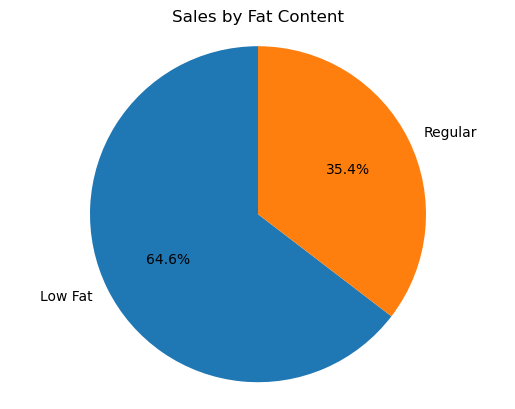

In [30]:
sales_by_fat = df.groupby('Item Fat Content')['Total Sales'].sum()
plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.1f%%', startangle = 90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### Total Sales by Item Type

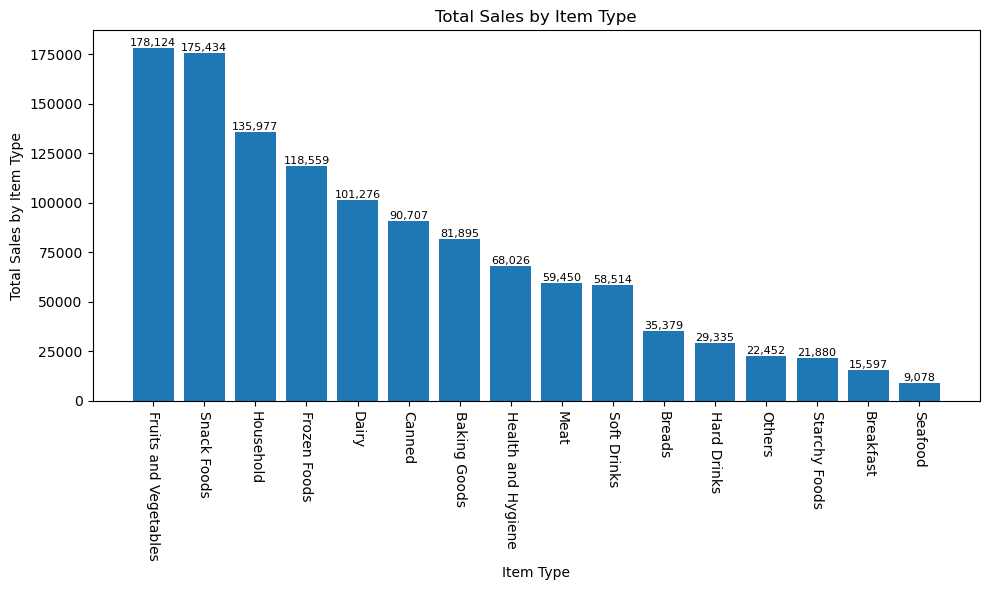

In [48]:
sales_by_type = df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation = -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales by Item Type')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Fat Content by Outlet for Total Sales

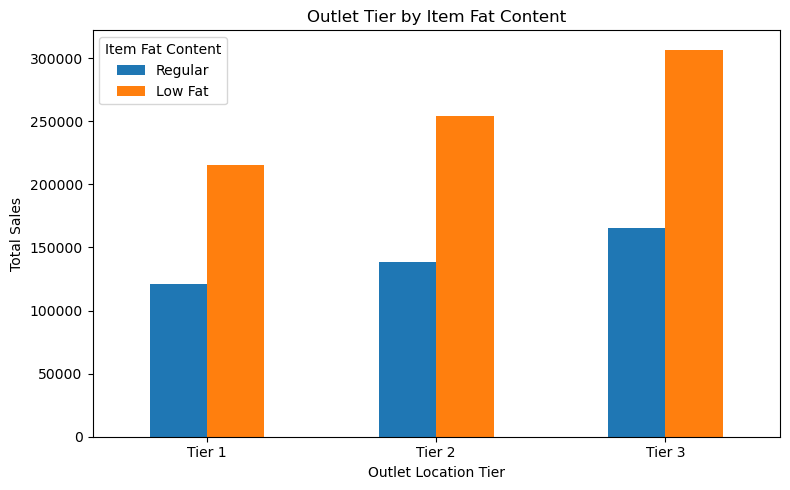

In [50]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Total Sales'].sum().unstack()
grouped = grouped[['Regular' , 'Low Fat']]

ax = grouped.plot(kind = 'bar', figsize = (8,5), title = 'Outlet Tier by Item Fat Content')
plt.xticks(rotation=0)
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment

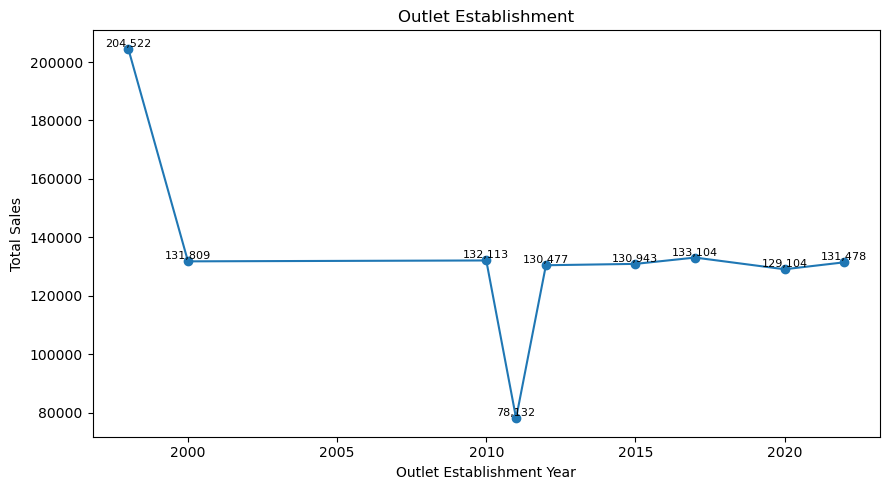

In [54]:
sales_by_year = df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()

plt.figure(figsize = (9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o', linestyle = '-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Total Sales by Outlet Size

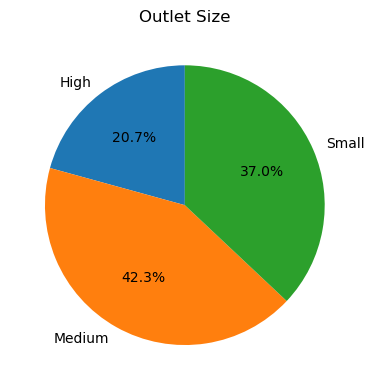

In [57]:
sales_by_size = df.groupby('Outlet Size')['Total Sales'].sum()

plt.figure(figsize = (4,4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Location

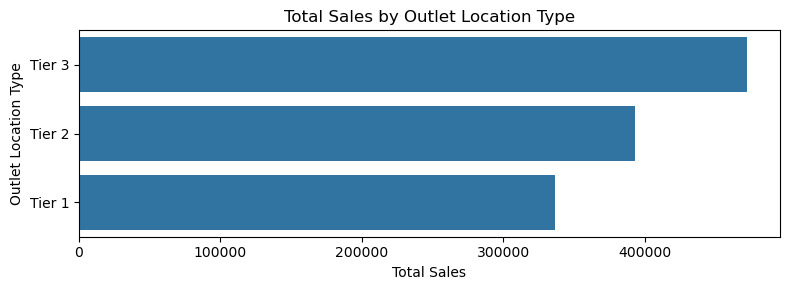

In [66]:
sales_by_location = df.groupby('Outlet Location Type')['Total Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Total Sales' , ascending = False)

plt.figure(figsize = (8,3))
ax = sns.barplot(x = 'Total Sales', y = 'Outlet Location Type', data = sales_by_location)

plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.title('Total Sales by Outlet Location Type')

plt.tight_layout()
plt.show()